In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
claims_df = pd.read_csv('../data/processed/dim_claims_train.csv').fillna(0)
claims_df.loc[:, 'reject_code'] = claims_df['reject_code'].astype(int)
# only the rejected claims should be examined when determining reject code
claims_df = claims_df.loc[claims_df['pharmacy_claim_approved'] == 0]

## How well does a Decision Tree predict a rejected claim's rejection code (`reject_code`)?
- The decision tree can perfectly predict the rejection code. This is expected because our EDA revealed a deterministic rejection code scheme for each payer/drug combination.
- This decision tree effectively determines the formulary for each payer.
- All models are evaluated using 5-fold cross-validation.

In [3]:
claims_X = claims_df[['bin', 'drug']].values.astype('str')
claims_y = claims_df['reject_code'].values

ohe = OneHotEncoder(sparse=False)
claims_X = ohe.fit_transform(claims_X.tolist())

Decision Tree accuracy = 1.0
Decision Tree precision = 1.0
Decision Tree recall = 1.0


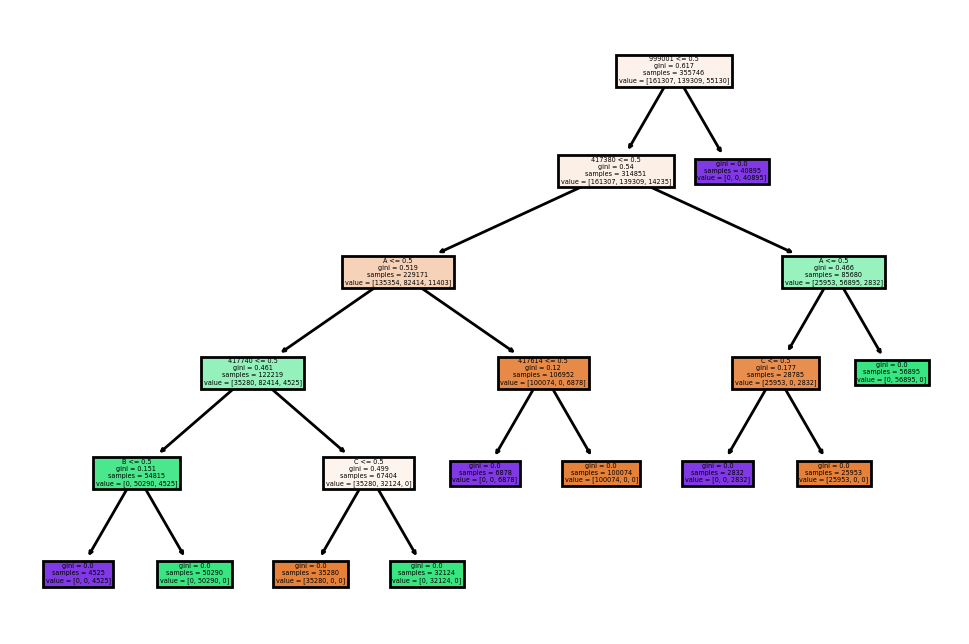

In [4]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)
cv.get_n_splits(claims_X)

accuracy = []
precision = []
recall = []

for train_index, test_index in cv.split(claims_X):
    X_train, X_test = claims_X[train_index], claims_X[test_index]
    y_train, y_test = claims_y[train_index], claims_y[test_index]

    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    accuracy.append(accuracy_score(y_test, model.predict(X_test)))
    precision.append(precision_score(y_test, model.predict(X_test), average='micro'))
    recall.append(recall_score(y_test, model.predict(X_test), average='micro'))

accuracy = np.array(accuracy)
recall = np.array(recall)
precision = np.array(precision)
print(f'Decision Tree accuracy = {round(np.mean(accuracy), 2)}')
print(f'Decision Tree precision = {round(np.mean(precision), 2)}')
print(f'Decision Tree recall = {round(np.mean(recall), 2)}')

names = [x.split('_')[1] for x in ohe.get_feature_names()]
f = plt.figure(dpi=200)
fig = model.fit(X_train, y_train)
plot_tree(fig, filled = True, feature_names=names)
plt.show()

# Hyperparameter Tuning
- The hyperparameters of `criterion`, `splitter`, and `ccp_alpha` will be adjusted.

## How does changing `criterion` change the result?
- No change.

In [5]:
for hyperparameter in ['gini', 'entropy']:
    
    cv = KFold(n_splits=5, random_state=42, shuffle=True)
    cv.get_n_splits(claims_X)
    
    accuracy = []
    precision = []
    recall = []

    for train_index, test_index in cv.split(claims_X):
        X_train, X_test = claims_X[train_index], claims_X[test_index]
        y_train, y_test = claims_y[train_index], claims_y[test_index]

        model = DecisionTreeClassifier(random_state=42, criterion=hyperparameter)

        model.fit(X_train, y_train)

        accuracy.append(accuracy_score(y_test, model.predict(X_test)))
        precision.append(precision_score(y_test, model.predict(X_test), average='micro'))
        recall.append(recall_score(y_test, model.predict(X_test), average='micro'))

    accuracy = np.array(accuracy)
    recall = np.array(recall)
    precision = np.array(precision)

    print(f'-- {hyperparameter} --')
    print(f'Decision Tree accuracy = {round(np.mean(accuracy), 2)}')
    print(f'Decision Tree precision = {round(np.mean(precision), 2)}')
    print(f'Decision Tree recall = {round(np.mean(recall), 2)}')

-- gini --
Decision Tree accuracy = 1.0
Decision Tree precision = 1.0
Decision Tree recall = 1.0
-- entropy --
Decision Tree accuracy = 1.0
Decision Tree precision = 1.0
Decision Tree recall = 1.0


## How does changing `splitter` change the result?
- No change.

In [6]:
for hyperparameter in ['best', 'random']:
    
    cv = KFold(n_splits=5, random_state=42, shuffle=True)
    cv.get_n_splits(claims_X)
    
    accuracy = []
    precision = []
    recall = []

    for train_index, test_index in cv.split(claims_X):
        X_train, X_test = claims_X[train_index], claims_X[test_index]
        y_train, y_test = claims_y[train_index], claims_y[test_index]

        model = DecisionTreeClassifier(random_state=42, splitter=hyperparameter)

        model.fit(X_train, y_train)

        accuracy.append(accuracy_score(y_test, model.predict(X_test)))
        precision.append(precision_score(y_test, model.predict(X_test), average='micro'))
        recall.append(recall_score(y_test, model.predict(X_test), average='micro'))

    accuracy = np.array(accuracy)
    recall = np.array(recall)
    precision = np.array(precision)

    print(f'-- {hyperparameter} --')
    print(f'Decision Tree accuracy = {round(np.mean(accuracy), 2)}')
    print(f'Decision Tree precision = {round(np.mean(precision), 2)}')
    print(f'Decision Tree recall = {round(np.mean(recall), 2)}')

-- best --
Decision Tree accuracy = 1.0
Decision Tree precision = 1.0
Decision Tree recall = 1.0
-- random --
Decision Tree accuracy = 1.0
Decision Tree precision = 1.0
Decision Tree recall = 1.0


## How does changing the `ccp_alpha` change the result?
- Values for alpha are determined by examining the `cost_complexity_pruning_path` and using the breakpoints provided.
- We must use a `ccp_alpha` = 0, because increasing it to the next threshold causes the model to miss a small, but relevant decision.

-------------------------------------------------------------
ccp_alpha =  0.0
Decision Tree accuracy = 1.0
Decision Tree precision = 1.0
Decision Tree recall = 1.0
Number of Leaves = 10



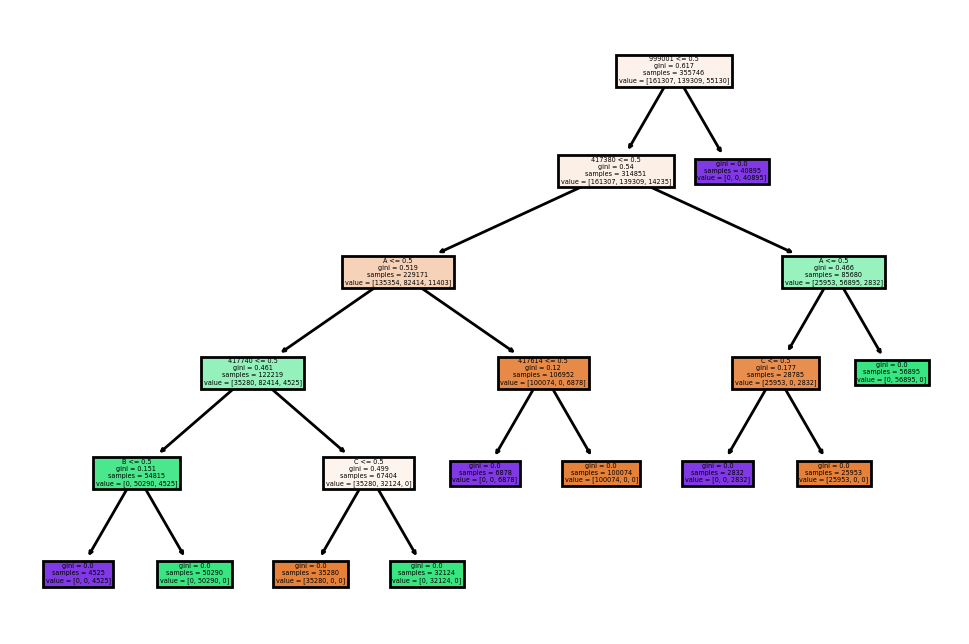

-------------------------------------------------------------
ccp_alpha =  0.014355044794608699
Decision Tree accuracy = 0.99
Decision Tree precision = 0.99
Decision Tree recall = 0.99
Number of Leaves = 9



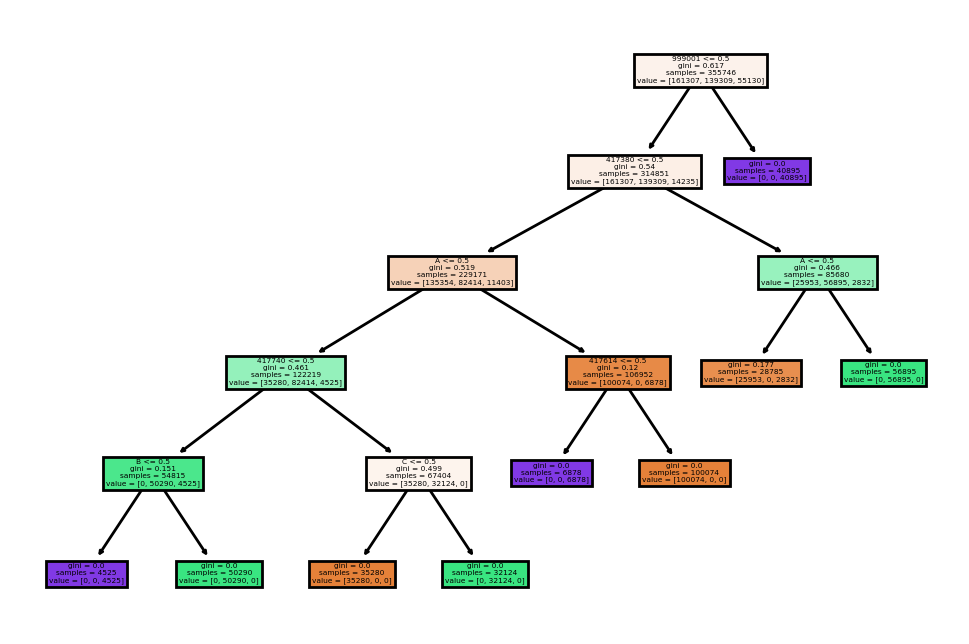

-------------------------------------------------------------
ccp_alpha =  0.02333945823440808
Decision Tree accuracy = 0.99
Decision Tree precision = 0.99
Decision Tree recall = 0.99
Number of Leaves = 8



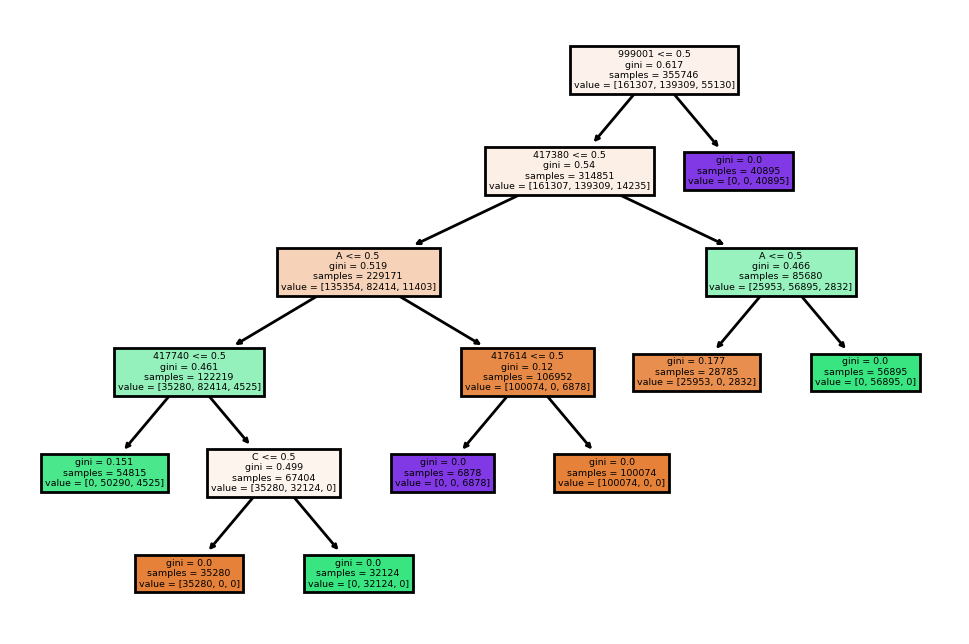

-------------------------------------------------------------
ccp_alpha =  0.036181326932039154
Decision Tree accuracy = 0.98
Decision Tree precision = 0.98
Decision Tree recall = 0.98
Number of Leaves = 7



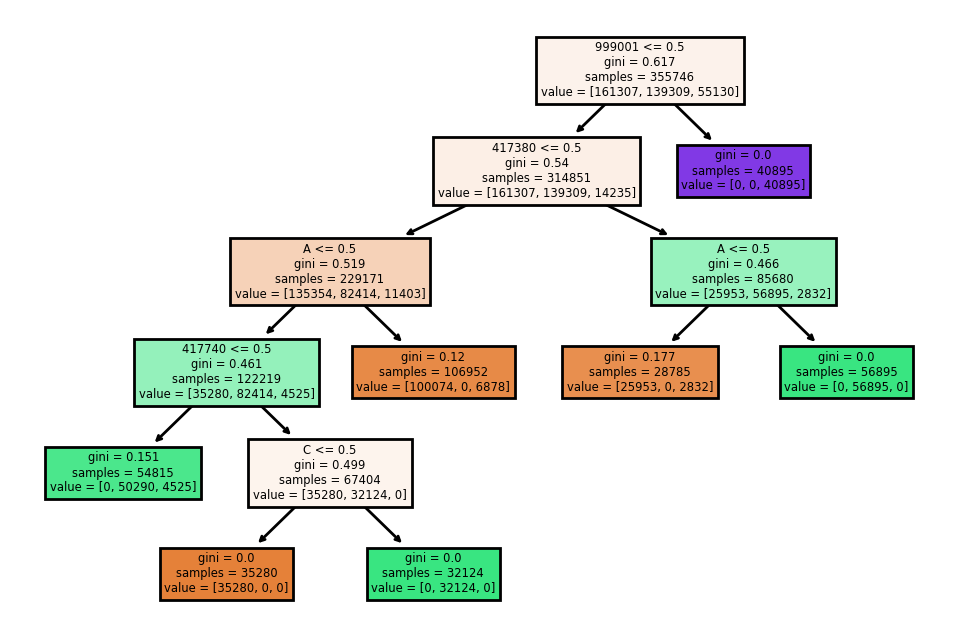

-------------------------------------------------------------
ccp_alpha =  0.06745208992541338
Decision Tree accuracy = 0.88
Decision Tree precision = 0.88
Decision Tree recall = 0.88
Number of Leaves = 5



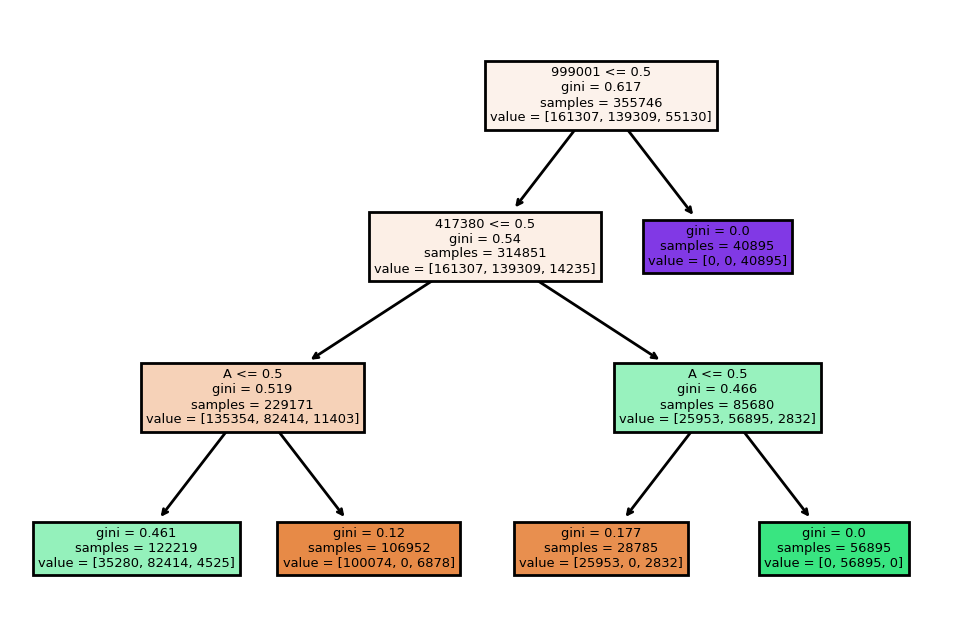

-------------------------------------------------------------
ccp_alpha =  0.08962760185573397
Decision Tree accuracy = 0.69
Decision Tree precision = 0.69
Decision Tree recall = 0.69
Number of Leaves = 2



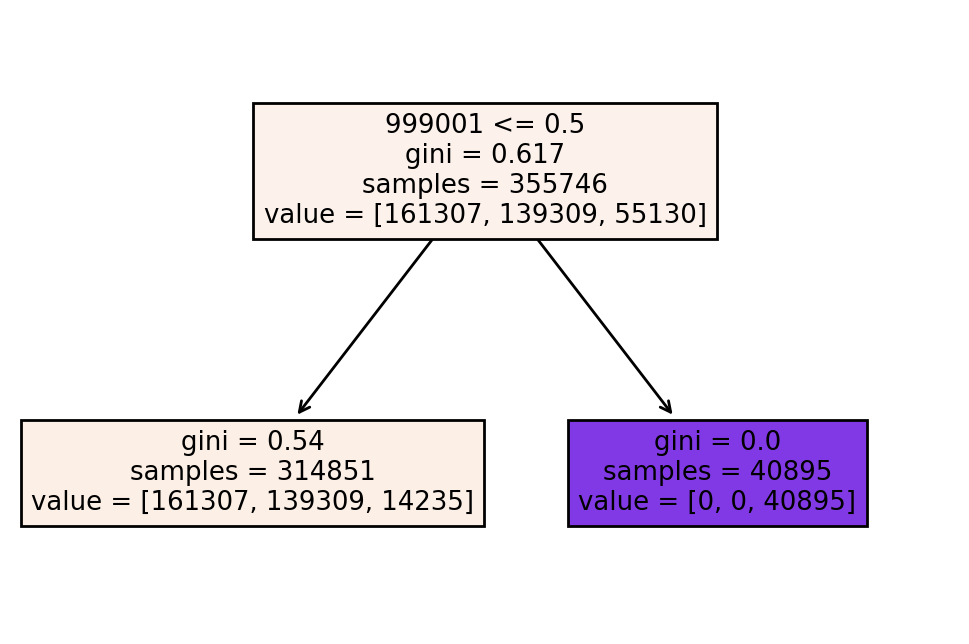

-------------------------------------------------------------
ccp_alpha =  0.13937183586444946
Decision Tree accuracy = 0.55
Decision Tree precision = 0.55
Decision Tree recall = 0.55
Number of Leaves = 1



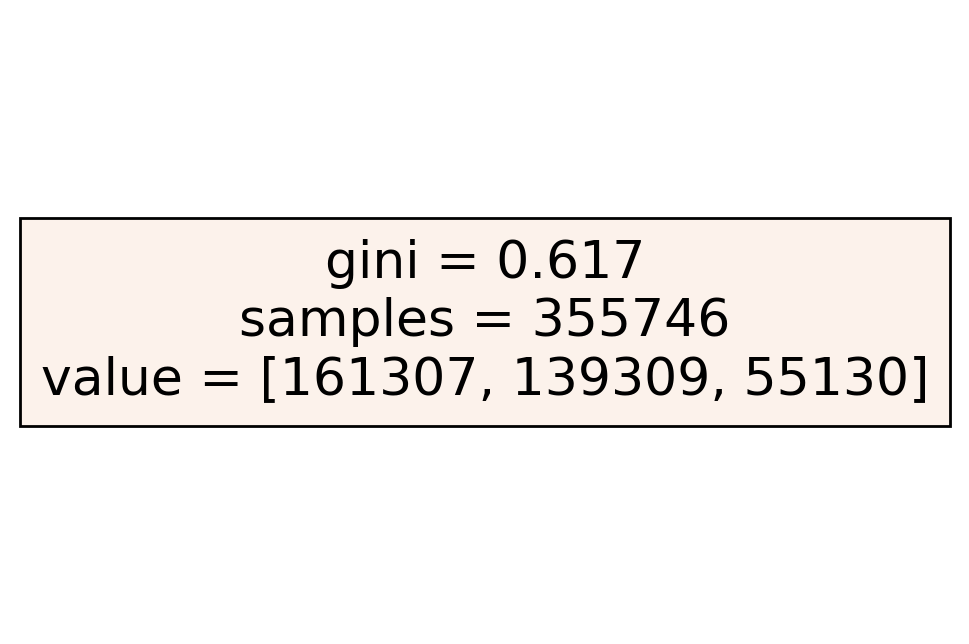

In [7]:
for hyperparameter in model.cost_complexity_pruning_path(X_train, y_train)['ccp_alphas']:
    
    cv = KFold(n_splits=5, random_state=42, shuffle=True)
    cv.get_n_splits(claims_X)
    
    accuracy = []
    precision = []
    recall = []

    for train_index, test_index in cv.split(claims_X):
        X_train, X_test = claims_X[train_index], claims_X[test_index]
        y_train, y_test = claims_y[train_index], claims_y[test_index]

        model = DecisionTreeClassifier(random_state=42, ccp_alpha=hyperparameter)

        model.fit(X_train, y_train)

        accuracy.append(accuracy_score(y_test, model.predict(X_test)))
        precision.append(precision_score(y_test, model.predict(X_test), average='micro'))
        recall.append(recall_score(y_test, model.predict(X_test), average='micro'))

    accuracy = np.array(accuracy)
    recall = np.array(recall)
    precision = np.array(precision)

    print('-------------------------------------------------------------')
    print(f'ccp_alpha =  {hyperparameter}')
    print(f'Decision Tree accuracy = {round(np.mean(accuracy), 2)}')
    print(f'Decision Tree precision = {round(np.mean(precision), 2)}')
    print(f'Decision Tree recall = {round(np.mean(recall), 2)}')
    print(f'Number of Leaves = {model.get_n_leaves()}' + '\n')
    
    names = [x.split('_')[1] for x in ohe.get_feature_names()]
    f = plt.figure(dpi=200)
    fig = model.fit(X_train, y_train)
    plot_tree(fig, filled = True, feature_names=names)
    plt.show()

# Current Best Model
- The current best model is a decision tree that can perfectly predict each rejection code from two features: `bin` and `drug`.
- A `ccp_alpha` of 0 is used, because any trimming reduces the prediction quality.
- The perfect prediction is believed to be represented in the data from our exploration. Each drug+bin combination has a single rejection code associated with it.

ccp_alpha =  0
Decision Tree accuracy = 1.0
Decision Tree precision = 1.0
Decision Tree recall = 1.0
Number of Leaves = 10



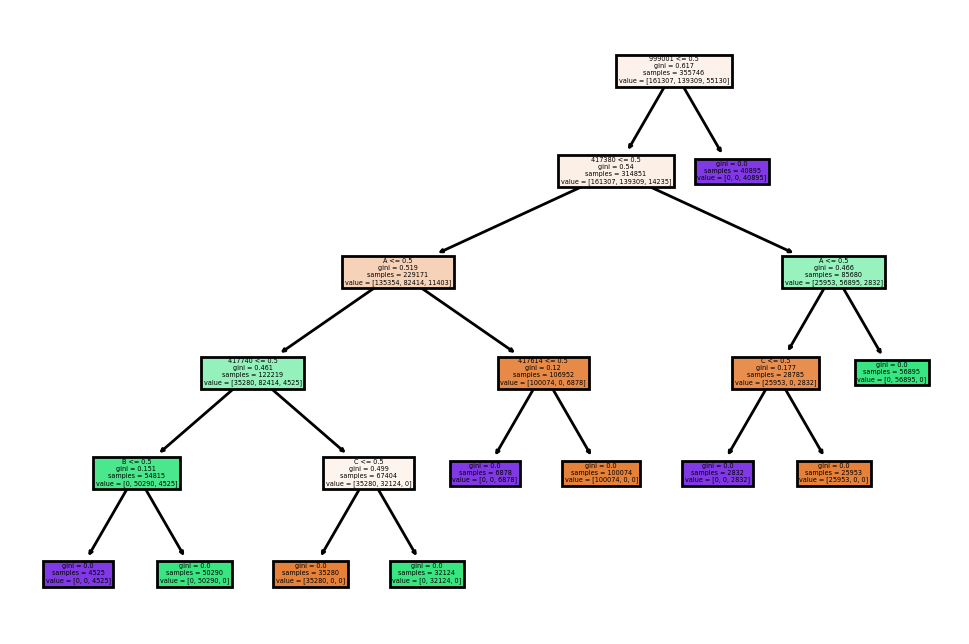

In [8]:
hyperparameter = 0

cv = KFold(n_splits=5, random_state=42, shuffle=True)
cv.get_n_splits(claims_X)

accuracy = []
precision = []
recall = []

for train_index, test_index in cv.split(claims_X):
    X_train, X_test = claims_X[train_index], claims_X[test_index]
    y_train, y_test = claims_y[train_index], claims_y[test_index]

    model = DecisionTreeClassifier(random_state=42, ccp_alpha=hyperparameter)

    model.fit(X_train, y_train)
    
    accuracy.append(accuracy_score(y_test, model.predict(X_test)))
    precision.append(precision_score(y_test, model.predict(X_test), average='micro'))
    recall.append(recall_score(y_test, model.predict(X_test), average='micro'))

accuracy = np.array(accuracy)
recall = np.array(recall)
precision = np.array(precision)

print(f'ccp_alpha =  {hyperparameter}')
print(f'Decision Tree accuracy = {round(np.mean(accuracy), 2)}')
print(f'Decision Tree precision = {round(np.mean(precision), 2)}')
print(f'Decision Tree recall = {round(np.mean(recall), 2)}')
print(f'Number of Leaves = {model.get_n_leaves()}' + '\n')

names = [x.split('_')[1] for x in ohe.get_feature_names()]
f = plt.figure(dpi=200)
fig = model.fit(X_train, y_train)
plot_tree(fig, filled = True, feature_names=names)
plt.show()